# Uber Supply Demand Gap

In [30]:
# import all libraries required in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Step1: Reading and Understanding the Data

In [31]:
# import the given dataset of uber 
Uber = pd.read_csv("C:/Users/user/Downloads/Uber Request Data.csv")
Uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [32]:
# Convert the date fields to date time and since the date in the source data has different formats and it is possible for the 
# day and month to be interchanged ,have specified dayfirst to True.

Uber['Request timestamp'] = Uber['Request timestamp'].astype(str)
Uber['Request timestamp'] = Uber['Request timestamp'].str.replace('/','-')
Uber['Request timestamp'] = pd.to_datetime(Uber['Request timestamp'], dayfirst = True)
Uber['Drop timestamp'] = pd.to_datetime(Uber['Drop timestamp'], dayfirst = True)
Uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [33]:
# inspecting the dataset
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [34]:
# Dimensions of df
Uber.shape

(6745, 6)

In [35]:
# Data description
Uber.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


## Step2 :- Data Cleaning
In Data Cleaning, checked for duplicate rows if available, using info checked non-null values in each variable, converted column 'Request timestamp' and 'Drop timestamp' to DateTime and created derived variables.

In [36]:
# checking for null values column wise
Uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [37]:
# Calculating the Missing Values % contribution in DF

round(100*(Uber.isnull().sum()/len(Uber.index)), 2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

__Inference:__
- More than 50% of Drop time is null because of Cancelled Trips which makes sense.
- Around 40% of Driver Id is null because of Cancelled Trips which makes sense.

In [38]:
# check if any duplicates record exists
sum(Uber.duplicated(subset = "Request id")) != 0

False

In [39]:
# Let us check the null values of Drivers id
Uber[np.isnan(Uber['Driver id'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT
4096,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT
4097,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT
4098,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT
4099,7,Airport,NaN,No Cars Available,2016-07-11 00:30:00,NaT
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


As we can see the Driver id has NaN value when status = No Cars available


In [40]:
# Convert driver id field from float to int and replace the nan values to 0.This field will not be used for any computation and
# hence no harm in imputing the values to 0.

Uber['Driver id'] = Uber[['Driver id']].fillna(0).astype(int)
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          6745 non-null   int32         
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 289.9+ KB


In [41]:
# Let us see the NaN values of Drop timestamp
Uber[np.isnan(Uber['Drop timestamp'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,1,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,1,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,1,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,2,Cancelled,2016-07-12 19:14:00,NaT
...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,NaT


In [42]:
# Remove Drop timestamp column as we will not be using it for any calculations. Hence safe to remove.
Uber = Uber.drop(['Drop timestamp'], axis=1) 

In [43]:
# again check null values in each column

round(100*(Uber.isnull().sum()/len(Uber.index)), 2)

Request id           0.0
Pickup point         0.0
Driver id            0.0
Status               0.0
Request timestamp    0.0
dtype: float64

In [44]:
# Create a new column called request hour from the request timestamp column
# to identify the hours where supply demand gap exists

Uber['Request hour'] = Uber['Request timestamp'].apply(lambda x: x.strftime('%H'))
Uber['Request hour'] =  Uber['Request hour'].astype(int)
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8


#### Binning Into Time Categories

In [45]:
# Create a new column from the hours column with the following assumptions to get the time of day based on Hours values
# 4:00 Am to 7:59Am is Early morning
# 8:00 AM to 11:59 is Morning
# 12:00 to 15:59 is Afternoon
# 16:00 to 19:59 is Evening
# 20:00 to 23:59 is Night
# 24:00 to 3:59 AM is late Night

def timeslot(x):
    if x >= 4 and x < 8:
        return 'Early Morning'
    elif x >= 8 and x < 12:
        return 'Morning'
    elif x >= 12 and x < 16:
        return 'Afternoon'
    elif x >= 16 and x < 20:
        return 'Evening'
    elif x >= 20:
        return 'Night'
    elif x >= 0 and x < 4:
        return 'Late Night'
    
Uber['Request timeslot'] = Uber['Request hour'].apply(timeslot)
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning


In [46]:
# Create a new column called day of week and fetch the day of week from the request date time column

Uber['Request dayofweek'] = Uber['Request timestamp'].dt.day_name()
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request dayofweek
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday


## Step3 :- Data Analysis

### Univariate Analysis

#### Analyse the number of requests for all Trip Status ( Trip Completed, Cancelled and No Cars Available)

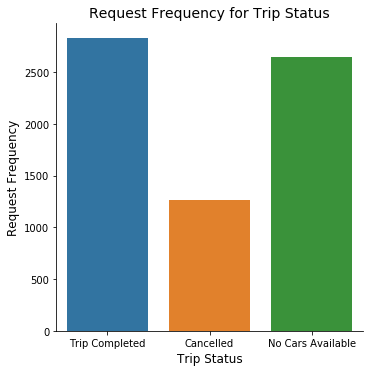

In [47]:
#Ploting request frequency for trip status

sns.catplot(x="Status", kind="count", data=Uber)

plt.title('Request Frequency for Trip Status', fontsize = 14)
plt.xlabel("Trip Status", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)

plt.show()

- From above analysis we can easily see that "No cars available" status is more frequent than the number of trips **"cancelled"** status.
- Hence, if someone would have thought that, due to drivers may cancel the trip cause the unavailability of the Cab is not entirely True. But the problem is because of **"No cars available"** in most of the cases.

#### Let us see the percentage of above graph with pie chart

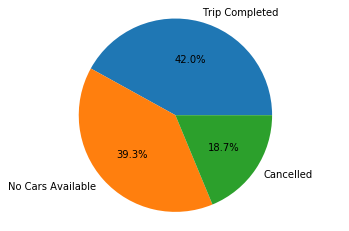

In [48]:
# Status distribution in pie Chart
Uber.loc[(Uber.Status =="Trip Completed"),'TripComp'] =1
Uber.loc[(Uber.Status =="No Cars Available"),'NoCars'] =1
Uber.loc[(Uber.Status =="Cancelled"),'Cancel'] =1

labels = ['Trip Completed', 'No Cars Available', 'Cancelled']
sizes = [Uber['TripComp'].value_counts()[1],
         Uber['NoCars'].value_counts()[1],
         Uber['Cancel'].value_counts()[1],
         ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()

- As Mention earlier that percentage of no cars available is more as compared to cancelled.

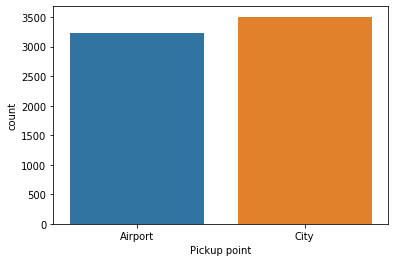

In [49]:
# looking for insight in pickup point
sns.countplot(x="Pickup point", data=Uber)
plt.show()

#There isn't much difference in airport and city requests.



- Above analysis shows that there are 2 pickup points in the dataset.
- Count of both pickup points  Airport  and  City  are almost same.

### Bivariate Analysis

In [50]:
# Analyze Status and Pickup point.
Uber.groupby(['Status','Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

#### Identify the number of requests for trips originating from airport and city for all the 3 trip status.

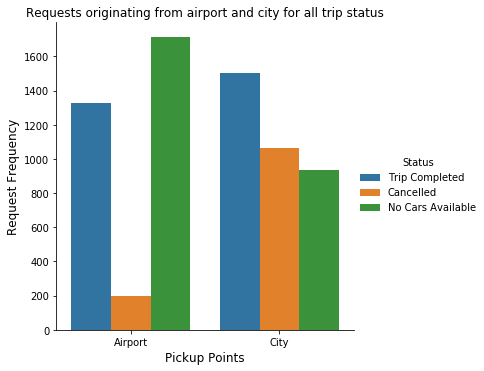

In [51]:
# Ploting frequecy of request at pickup points segmeted by status 
sns.catplot(x="Pickup point", hue="Status", kind="count", data=Uber);

plt.title('Requests originating from airport and city for all trip status', fontsize = 12)
plt.xlabel("Pickup Points", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)

plt.show()

From above plot it can be see that :-
- Pickup Point : **Airport**<br/>
    1) `No Cars Available` status count is very high.<br/>
    2) `Cancelled` status count is very low which is again obvious, Cabs in the Airport area are mostly waiting for the passangers from the Airport.<br/>
- Pickup Point : **City**<br/>
    1) `Cancelled` status count is high due to either Driver doesn't want to go to the Airport or Passanger cancels the trip. It's all about choice here.<br/>
    2) `No Cars Available` status count is also high enough to create supply demand Gap, hence this is the problem look into.

#### Count of 'Cancelled' or 'No Cars Available'

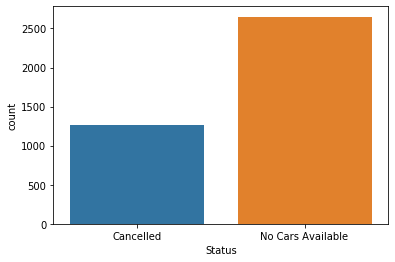

In [52]:
# Plot Showing frequency of requests that get 'Cancelled' or 'No Cars Available'

sns.countplot(x="Status", data=Uber[Uber.Status != 'Trip Completed'])

plt.show()

From above plot it an be clearly seen that the status of **No Cars available** is more than the **Cancelled** .

#### Identifying most problematic types of requests (city to airport / airport to city)

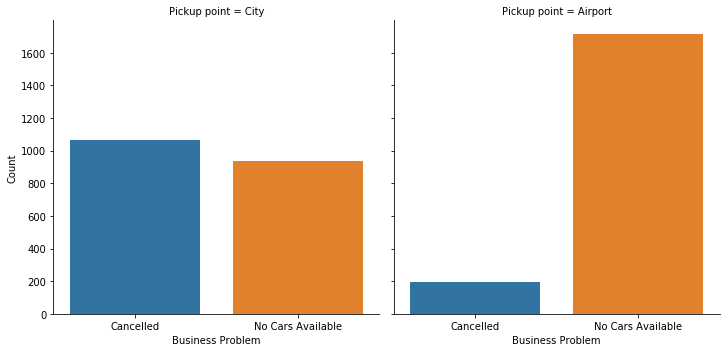

In [53]:
# most problematic types of requests (city to airport / airport to city)

g = sns.catplot(x="Status",col="Pickup point",kind="count", data=Uber[Uber.Status != 'Trip Completed'])
g.set_axis_labels("Business Problem" ,"Count")
plt.show()

### Derived Metrics and Analysis

#### Let us see the status of cars for each day of week

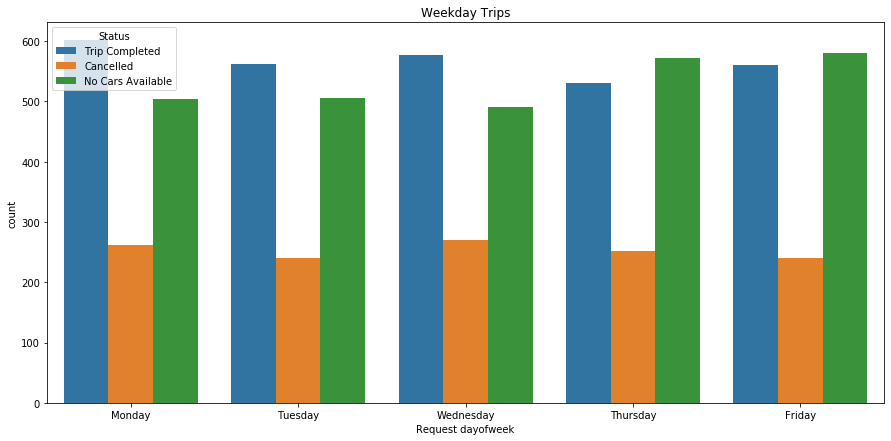

In [54]:
# Ploting Request status for each day
plt.figure(figsize=(15,7))
plt.title("Weekday Trips")
sns.countplot(x="Request dayofweek",hue='Status',data=Uber)

plt.show()

From above plot it can be see that the cancelled trip frequency is almost same.

#### Let as see the number of request count per days

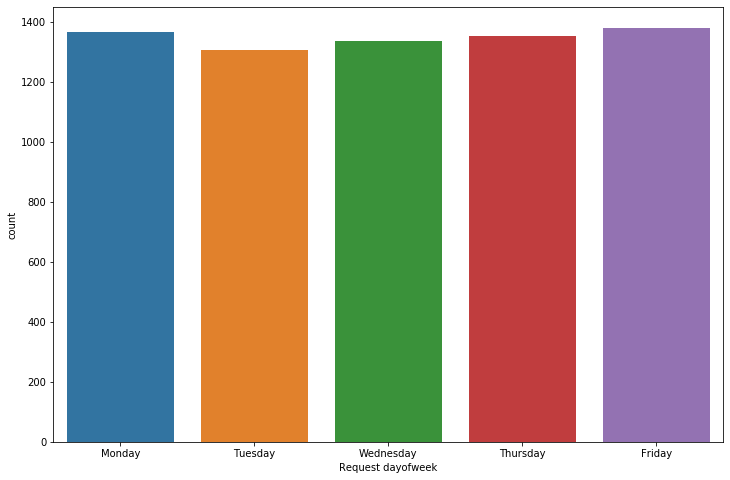

In [55]:
# Ploting request count vs Rquest day 
plt.figure(figsize=(12, 8))
sns.countplot(x='Request dayofweek', data=Uber)
plt.show()

# There isn't much difference in requests vs days of the week

It can be see that there isn't much difference in request on weekdays.

#### Identify whether days of week has any impact on the number of requests from airport and city for 'Cancelled' and 'No Cars Available' trip status

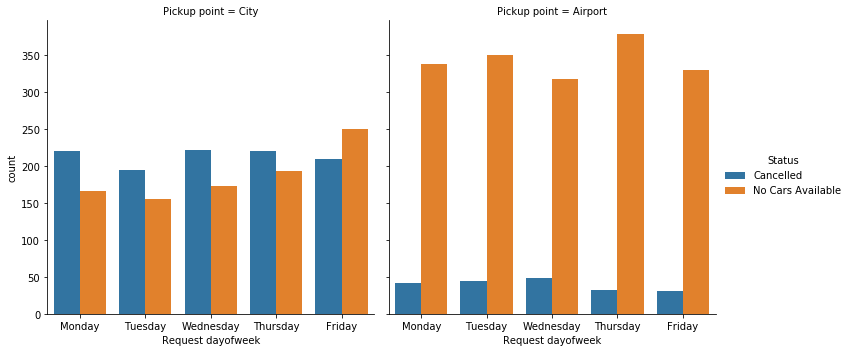

In [56]:
# Ploting request status at different pickup points in week days
# Ordering days
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday']

sns.catplot(x="Request dayofweek", col= 'Pickup point', hue="Status", kind="count", 
            data=Uber[Uber["Status"] != "Trip Completed"], order=order_days)

plt.show()

From above plot it can be seen that -
- For trips from city - airport, except for friday, cancelled trips are more for all other days of week.
- For trips from airport - city, for all days there are more number of No Cars Available.

#### Now Let us see the request per hour.

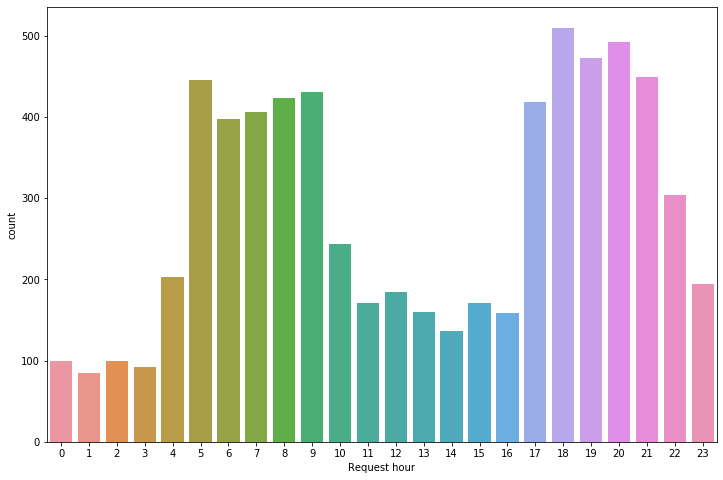

In [57]:
# Plotig a countplot for request hour
plt.figure(figsize=(12, 8))
sns.countplot(x='Request hour', data=Uber)
plt.show()

From the above plot it can be seen that the in the early hours and late hours the no of request is much more.

##### Let us check them separately for Airport & City 

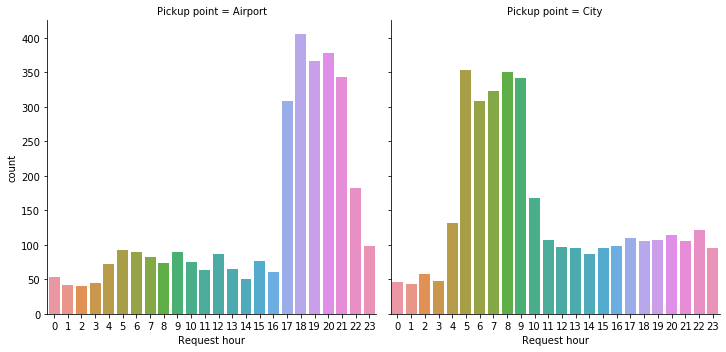

In [58]:
# Plotting Hourly distribution by Pickup point

sns.catplot(x = "Request hour", col = "Pickup point", kind = "count", data = Uber)
plt.show()

####  Let us plot no of request per hour by status.

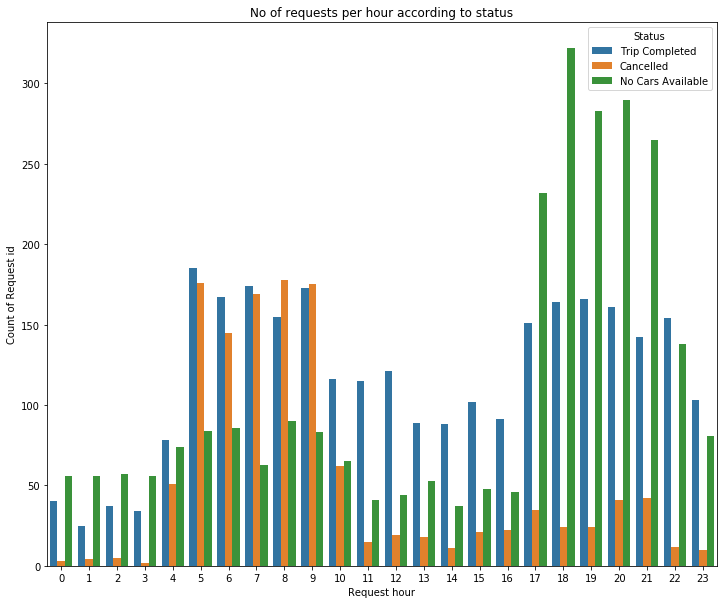

In [59]:
# Plotting for requests per hour according to status 
plt.figure(figsize = (12,10))
sns.barplot(x = 'Request hour', y = 'Request id', hue = 'Status', data = Uber, estimator = len)
plt.title("No of requests per hour according to status")
plt.ylabel("Count of Request id")
plt.show()

#####  Plotting  a graph of request per hour for City & Airport

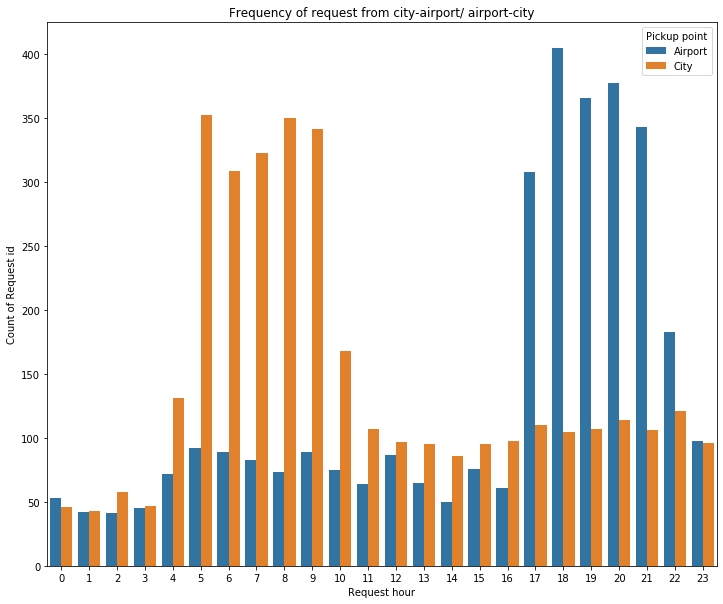

In [60]:
# Plot of no. of requests from city to airport/airport to city
plt.figure(figsize =(12,10))
sns.barplot(x = 'Request hour', y = 'Request id', hue = 'Pickup point', data = Uber, estimator = len)
plt.title("Frequency of request from city-airport/ airport-city")
plt.ylabel("Count of Request id")
plt.show()

From above plot it can be seen why that there are higher request during **Morning** and **Evening** hours which is expected as it is rush hours.

#### Now ploting the request by timeslot as we have diffrenciated earlier.

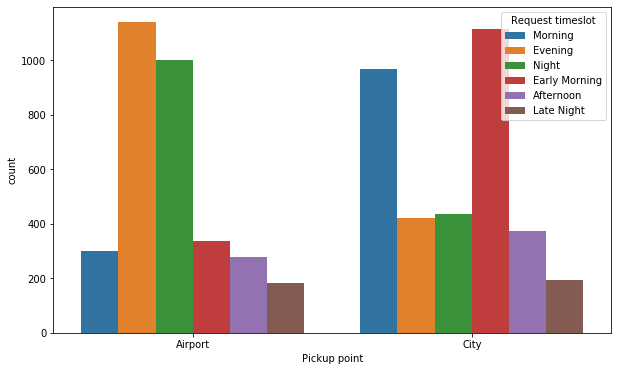

In [61]:
# Ploting pickup point segmented by time slot

plt.figure(figsize = (10,6))
sns.countplot(x = 'Pickup point', hue = "Request timeslot", data = Uber)
plt.show()

From the above plot it can be seen that __Airport__ has the highest request in the evening whereas __City__ has the highest request in the morning.

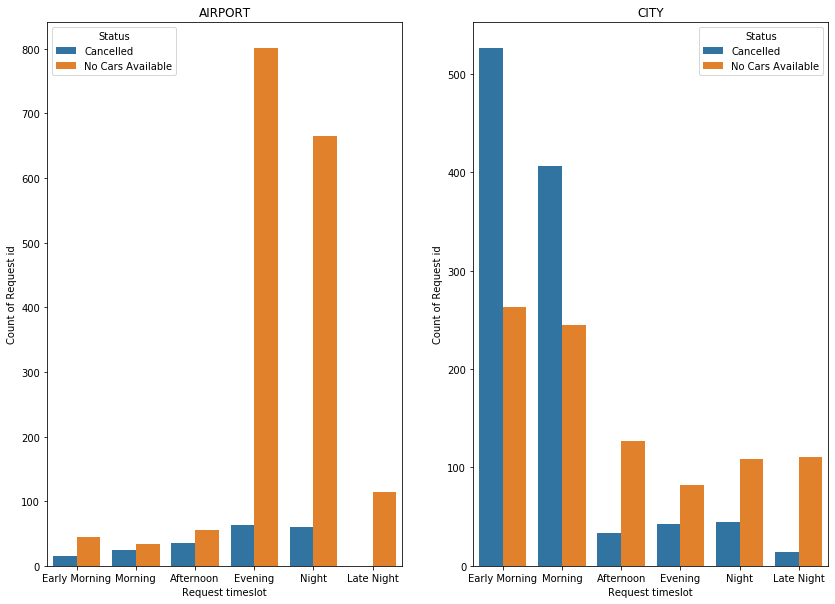

In [62]:
# Plots of frquency of request

order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
plt.figure(figsize = (14,10))

plt.subplot(1,2,1)
airport = Uber[(Uber['Pickup point']=='Airport') & (Uber['Status']!='Trip Completed')]
sns.barplot(x = 'Request timeslot', y = 'Request id', hue = 'Status', data = airport, estimator = len, order = order_timeslot)
plt.title("AIRPORT")
plt.ylabel("Count of Request id")


plt.subplot(1,2,2)
city = Uber[(Uber['Pickup point']=='City') & (Uber['Status'] != 'Trip Completed')]
sns.barplot(x = 'Request timeslot', y = 'Request id', hue = 'Status', data = city, estimator = len, order = order_timeslot)
plt.title("CITY")
plt.ylabel("Count of Request id")
plt.show()

The above plot shows that for most of the  Airport pickup requests there are no cars available and most requests that get cancelled are from city pickup requests.

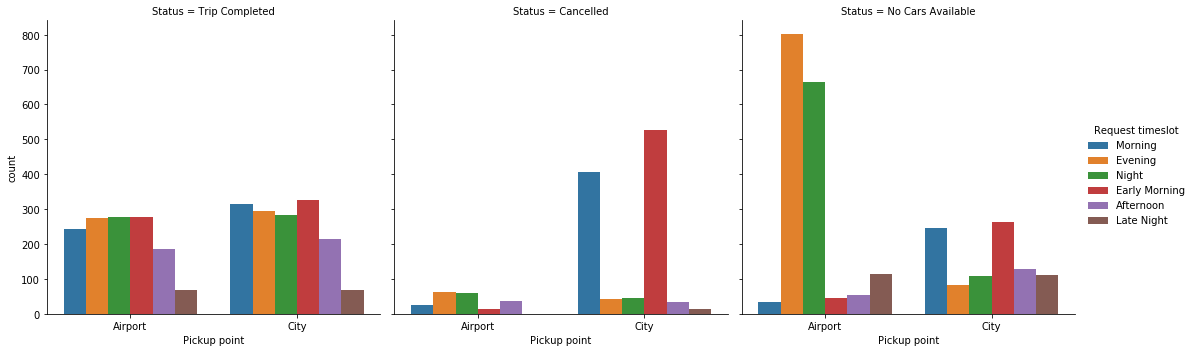

In [63]:
# segmenting the timeslot vs both Status and pickup point 

sns.catplot(x = 'Pickup point', col = "Status", hue = 'Request timeslot', data=Uber , kind="count")
plt.show()

From the below plot it is clear that:
- Airport requests during the evening slot (during which there is high airport request rate) there are no cars available.
- Most city requests get cancelled in the morning slot (during which there is high city request rate). 

#### Analyse the request frequency for Non Available Cars from Airport & City for all timeslots.

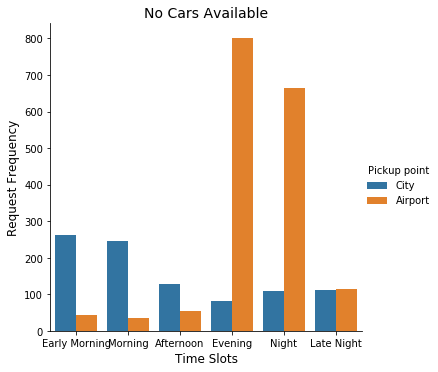

In [64]:
no_cars = Uber[(Uber['Status'] == 'No Cars Available')]

sns.catplot(x = "Request timeslot", hue = "Pickup point", kind = "count", data = no_cars, order = order_timeslot)

plt.title('No Cars Available', fontsize = 14)
plt.ylabel('Request Frequency', fontsize = 12)
plt.xlabel('Time Slots', fontsize = 12)

plt.show()

#### Analyse the request frequency of cars for Cancelled Trips from Airport & City for all timeslots.

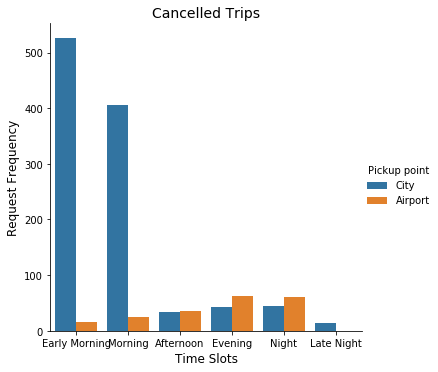

In [65]:
# The order of display of time slot
order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

cancelled_df = Uber[(Uber['Status'] == 'Cancelled')]

sns.catplot(x = "Request timeslot", hue = "Pickup point", kind = "count", data = cancelled_df, order = order_timeslot);

plt.title('Cancelled Trips', fontsize = 14)
plt.ylabel("Request Frequency", fontsize = 12)
plt.xlabel("Time Slots", fontsize = 12)

plt.show()

From the above graph it can be seen that maximum number of cars not available are from airport - city, during the evening hours followed by night i.e. in between 4:00 PM to 11:59 PM.

#### Identify the approximate hour when more cars are unavailable during the identified timeslots and pickup point.

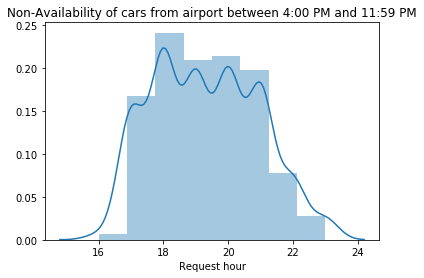

In [66]:
evening_unavailable_cars_df = no_cars[(((no_cars['Request timeslot'] == 'Evening') | (no_cars['Request timeslot'] == 'Night')) 
                                        & (no_cars['Pickup point'] == 'Airport'))]

plt.title('Non-Availability of cars from airport between 4:00 PM and 11:59 PM') 
sns.distplot(evening_unavailable_cars_df['Request hour'], bins = 8) 
plt.show()

The above plot shows that more number of cars are unavailable around 6:00 PM followed by 8:00 PM, 7:00 PM, 9:00 PM and 5:00 PM

Hence, the most pressing problem is as follows :
- More cars are cancelled from city - airport, for timeslots between 4:00 AM and 11:59 AM
- More cars are unavailable from airport - city, for timeslots between 4:00 PM and 11:59 PM
    
##### Supply demand gap can be calculated as follows :
- Demand = Number of cars requested
- Supply = Cars that completed the trips.
- Supply Demand Gap = Cancelled cars plus unavailable cars

In [67]:
# creating demand column
Uber.loc[(Uber.Status == 'Trip Completed') | (Uber.Status == 'Cancelled')| (Uber.Status == 'No Cars Available'), 'demand'] = 'Demand' 

In [68]:
# creating supply column
Uber.loc[(Uber.Status == 'Trip Completed'), 'supply'] = 'Supply'

In [69]:
# creating gap column
Uber.loc[(Uber.Status == 'Cancelled')| (Uber.Status == 'No Cars Available'), 'gap'] = 'Gap' 

In [70]:
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request dayofweek,TripComp,NoCars,Cancel,demand,supply,gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,Demand,Supply,NaN
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,Demand,Supply,NaN
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,Demand,Supply,NaN


In [71]:
Uber_SupplyandDemand = pd.DataFrame([Uber.demand, Uber.supply, Uber.gap]).transpose()
Uber_SupplyandDemand.head()

,demand,supply,gap
0,Demand,Supply,NaN
1,Demand,Supply,NaN
2,Demand,Supply,NaN
3,Demand,Supply,NaN
4,Demand,Supply,NaN


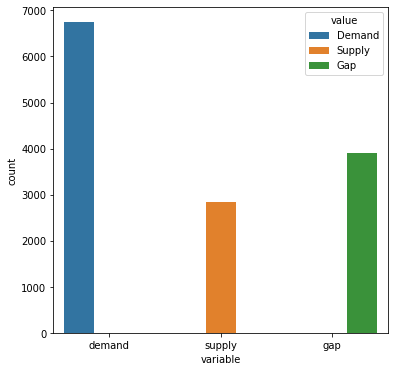

In [72]:
# plotting demand, supply and gap count
plt.figure(figsize=(6,6))
sns.countplot(x = "variable", hue = "value", data = pd.melt(Uber_SupplyandDemand))
plt.show()


Above plot clearly shows that gap exist and there is huge possible to bridge the gap and increase the revenue.<br>
 Gap = Demand - Supply <br>
Around 58% of 'gap' exists.

In [73]:
# Create a new column to determine supply vs supply demand gap
# function returns the value Supply or Supply Demand Gap based on the trip status

def setSupplyorSupplyDemandGap(x):
    if x == 'Trip Completed':
        return 'Supply'
    else:       
        return 'Supply demand gap'
    
Uber['Supply demand gap'] = Uber['Status'].apply(setSupplyorSupplyDemandGap)
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request dayofweek,TripComp,NoCars,Cancel,demand,supply,gap,Supply demand gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,Demand,Supply,NaN,Supply


#### Analyse the demand for cabs for each timeslots for trips from airport and city.

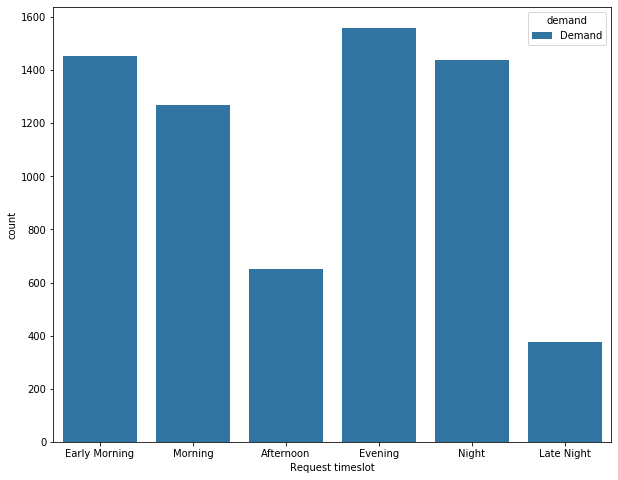

In [74]:
# segmenting demand across the request time slot

plt.figure(figsize=(10, 8))
sns.countplot(hue = 'demand', x = "Request timeslot", data = Uber, order = order_timeslot)
plt.show()

Above graph shows that morning and evening has the hightest demand for cabs.

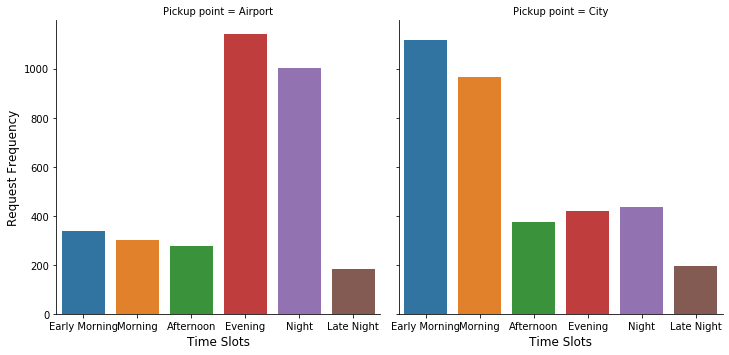

In [75]:
# plotting demand for cabs separately for Airport and City segmented by timeslots
plot = sns.catplot(x = 'Request timeslot', col = "Pickup point", kind = "count", data = Uber, order = order_timeslot)

plot.set_xlabels('Time Slots', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)

plt.show()

Irrespective of the trip status, it can be seen that :  
- For airport pickups, demand is more during the evening and night hours
- For city pickups, demand is more during the early morning and morning

####  Finding the time slots when the highest supply demand gap exists

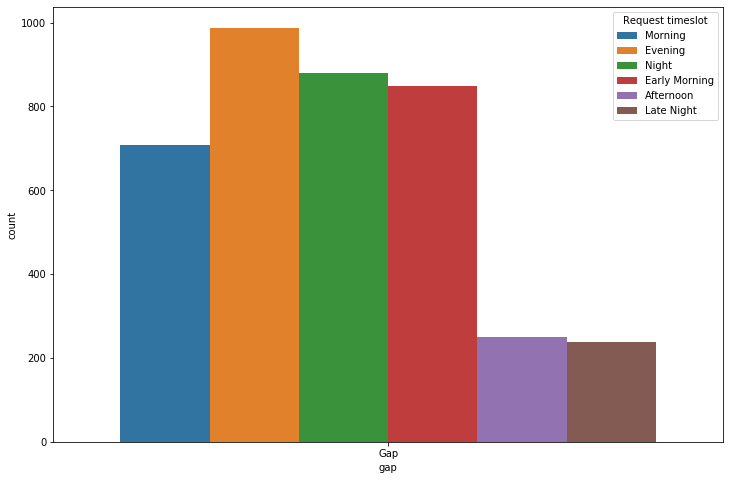

In [76]:
# segmenting gap across the request time slot
plt.figure(figsize=(12, 8))
sns.countplot(x = 'gap', hue = "Request timeslot", data = Uber)

plt.show()


From the above graph it can be seen that gap is mainly in the morning and evening timeslot, which again is in sync with all our other findings.

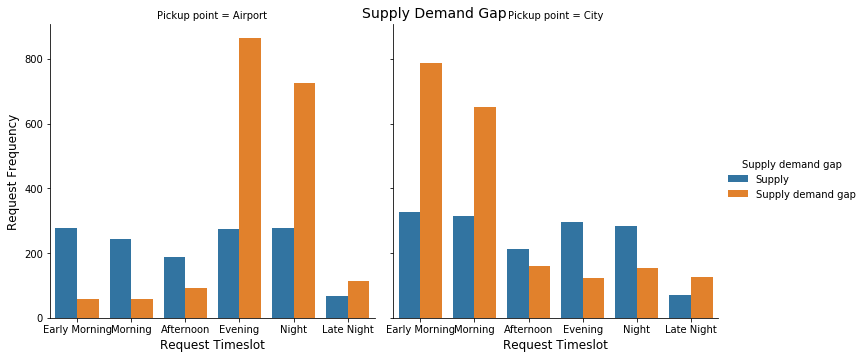

In [77]:
plot = sns.catplot(x="Request timeslot", hue="Supply demand gap", col = 'Pickup point', data=Uber, kind="count", 
                   order = order_timeslot);

plot.fig.suptitle('Supply Demand Gap', fontsize=14)
plot.set_xlabels('Request Timeslot', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)

        
plt.show()

The above plot shows the following :
- Supply demand gap is more in the evening (4:00 PM to 7:59 PM) and night (8:00 PM to 11:59 PM) for trips from Airport to City.
- Supply demand gap is more in the early morning (4:00 AM to 7:59 AM) and morning (8:00 AM to 11:59 AM) for trips from City to Airport     

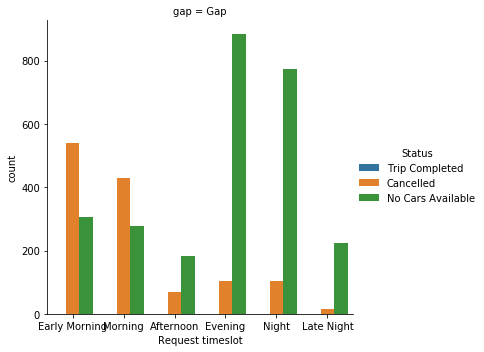

In [78]:
# segmenting gap across the status and request timeslot
sns.catplot(x = 'Request timeslot', col = "gap", hue = 'Status', data = Uber , kind = "count", order = order_timeslot)
plt.show()


As gap is sum of (cancelled + No cars available) : We can see that there is no plot in trip completed(Obvious).
- Hightest 'cancelled' gap comes from morning slot.
- Hightest 'No car available' gap comes from evening slot.

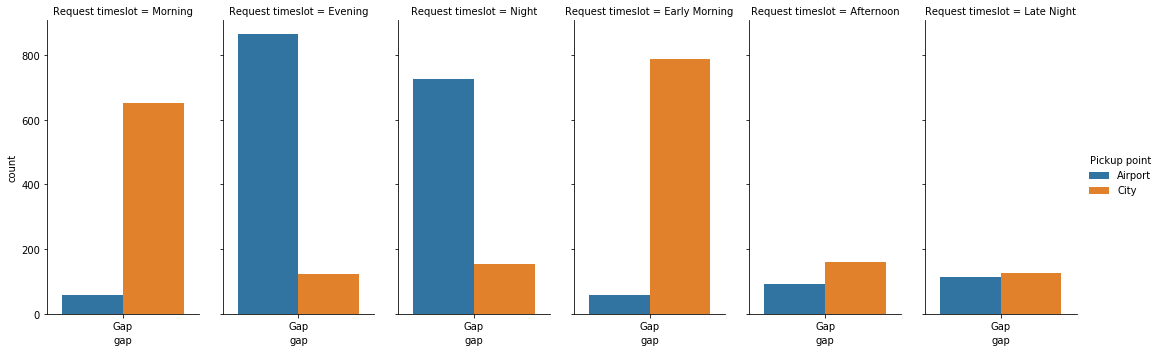

In [79]:
# segmenting gap across the pickup point and request timeslot
sns.catplot(x = 'gap', col = "Request timeslot", hue = 'Pickup point', data = Uber , kind = "count", aspect=0.5)
plt.show()


From the above graph it can be seen that:
- In the morning, **City** pickup has the highest gap.
- In the evening, **Airport** pickup has the highest gap.

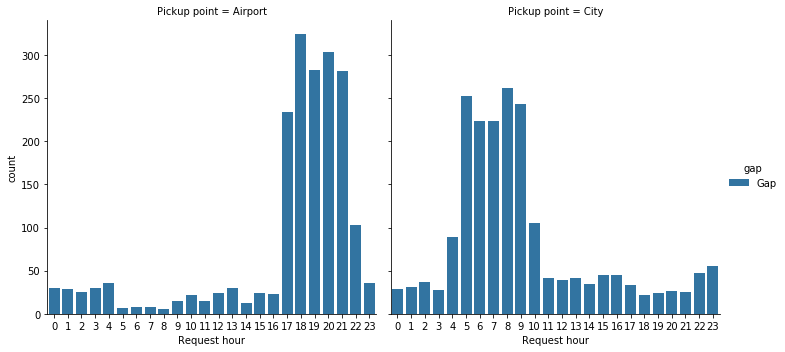

In [80]:
# segmenting the gap across the request hour and pickup point

sns.catplot(x = 'Request hour', col = "Pickup point", hue = 'gap', data = Uber , kind = "count")
plt.show()

From the above graph it can be seen that:
- Airport has hightest gap at 17-21 hours which is evening hours.
- City has hightest gap at 5-9 hours which is morning hours.
- But vice versa is not true

#### Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

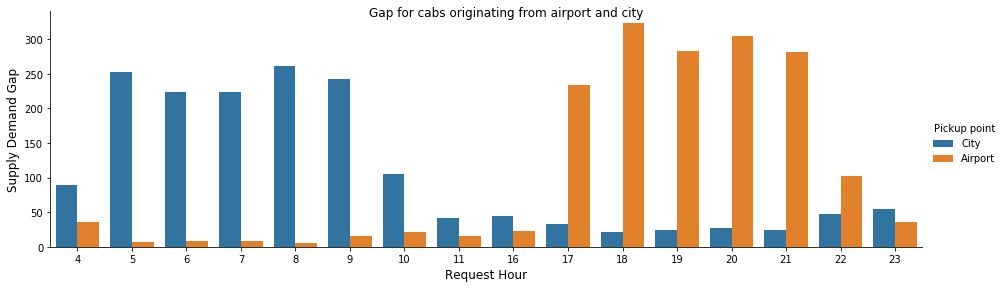

In [81]:
# filter based on the request time slots and supply demand gap

most_severe_gap_df = Uber[((Uber['Request timeslot'] == 'Evening') |
                           (Uber['Request timeslot'] == 'Night') | 
                           (Uber['Request timeslot'] == 'Early Morning') | 
                           (Uber['Request timeslot'] == 'Morning')) & 
                          (Uber['Supply demand gap'] == 'Supply demand gap')] 

plot = sns.catplot(x = "Request hour", hue = "Pickup point", data = most_severe_gap_df, kind = "count", 
            height=4, aspect = 3.2)

plot.fig.suptitle('Gap for cabs originating from airport and city', fontsize=12)
plot.set_xlabels('Request Hour', fontsize=12)
plot.set_ylabels('Supply Demand Gap', fontsize=12)


plt.show()

The above plot shows that the most severe supply demand gap is for the trip request from Airport - City, between 6:00 PM to 9:00 PM

### Conclusion :

- The supply demand gap for cab requests from airport to city is more during evening and night hours, maximizing at 
  6:00 PM
- The supply demand gap for cab requests from city to airport is more during early morning and morning hours, maximizing 
  at 8:00 AM
- Most severe supply demand gap is for trip from airport to city between 6:00 PM to 9:00 PM, maximizing at 6:00 PM

**Pickup Point: City**<br/>

As per above plots, the morning time slot show the greatest negative gap and it is problematic due to requests are being cancelled. Reason behind request cancellation could be morning rush. It can be considered that most probably drives cancelled the reuest for Ariport as they can get many rides within the city instead of single Airport ride.

**Pickup Point: Airport**<br/>

As per above plots, the evening time slot show the greatest negative gap and it is problematic due to No Cars Available. Reason behind *No Cars Available* could be due to not enough cars are available as cars might not be in the airport area due they are in the city and some of the drivers might have gone to home.

## Recommendations
Based on the performed analysis of data, there are some recommendations which can be used by Uber to bridge the gap between supply and demand:
- For the trips in the morning, drivers can be incentivized to make those trips.
    1. They could be given a bonus for each trip they complete from the city to the airport in the morning rush. This will ensure that less number of trips are cancelled.
    2. Uber can pay for the gas mileage of drivers to come back to the city without a ride.
    3. Uber can increase the demand at the airport to reduce idle time – by increased marketing and price cuts for the passengers
<br><br>    
- For the evening, since the number of drivers is less, some of the ways are:
    1. Drivers can again be given a bonus to complete a trip from the airport in the evening. This will ensure that the supply increases at the airport.
    2. Uber can also pay drivers to come without a passenger to the airport
    3. Another innovative way can be to pool the rides of passengers so that lesser number of cars can serve more passengers.


### Possible suggestions to fill the supply demand gap:

1. Provide incentives for airport trips during peak time.
2. Assigning few extra cabs specially to the airport trips.
3. Fixing a base price for drivers idle time in the airport or to come back to the city without any passenger.
4. Impose penalty for cancellation of requests by the drivers. Set a threshold for the maximum cancellation per day.
5. Promote continuous trip to airport with incentives.
6. Promote advance booking to airports and at the same time keeping drivers updated will the flight schedule with help them plan their work and they can accept the request as per their work plan.        